In [202]:
# Importing Data
import pandas as pd
excel_data = pd.ExcelFile('Renewable_energy_data_UK.xlsx') # Load all sheets or a specific sheet
data = excel_data.parse('Data') # Load a specific sheet
data.head()

,year,wind,marine,solar,hydro,solid_biomass,biogas,bioliquids,waste,co_firing,generation,gasprice,oilprice,coalprice,investment,installed_capacity,storage_capacity,consumption_per_capita
0,1990,9.22,0.0,0.0,5206.57,0.00,455.11,0.0,140.72,0.0,5811.62,NaN,348.01315,43.48,47.690,1270.85,NaN,298.19790
1,1991,8.58,0.0,0.0,4623.92,1.04,536.39,0.0,150.47,0.0,5320.40,NaN,281.45620,42.80,52.031,1621.71,NaN,272.57138
2,1992,32.51,0.0,0.0,5431.38,51.80,705.54,0.0,176.85,0.0,6398.08,NaN,263.89320,38.53,47.236,1724.89,NaN,328.62613
3,1993,217.43,0.0,0.0,4301.75,121.42,825.01,0.0,251.52,0.0,5717.13,NaN,225.16070,33.68,43.427,1884.82,NaN,298.19434
4,1994,343.50,0.0,0.0,5093.75,191.70,878.16,0.0,448.60,0.0,6955.71,NaN,204.51793,37.18,25.564,1959.01,NaN,363.34247


In [203]:
#checking for missing values
print(data.isnull().sum()) 

year                       0
wind                       0
marine                     0
solar                      0
hydro                      0
solid_biomass              0
biogas                     0
bioliquids                 0
waste                      0
co_firing                  0
generation                 0
gasprice                   6
oilprice                   0
coalprice                  0
investment                 0
installed_capacity         0
storage_capacity           6
consumption_per_capita     0
dtype: int64


In [204]:
print(data.dtypes) #Checking for data types

year                         int64
wind                       float64
marine                     float64
solar                      float64
hydro                      float64
solid_biomass              float64
biogas                     float64
bioliquids                 float64
waste                      float64
co_firing                  float64
generation                 float64
gasprice                   float64
oilprice                   float64
coalprice                  float64
investment                 float64
installed_capacity         float64
storage_capacity           float64
consumption_per_capita     float64
dtype: object


In [205]:
# Cleaning the data
data_cleaned = data.drop_duplicates() #Removing duplicate rows
data_cleaned = data_cleaned.dropna() #Handling missing values by dropping rows with missing values
data_cleaned.columns = [col.strip().lower().replace(" ", "_") for col in data_cleaned.columns] #Renaming columns for clarity

# Transforming to standardise units 
# Converting GWh to MWh and kWh to MWh
conversion_columns_gwh_to_mwh = [
    'generation', 'wind', 'marine', 'solar', 'hydro',
    'solid_biomass', 'biogas', 'bioliquids', 'waste', 'co_firing'
]
if all(col in data_cleaned.columns for col in conversion_columns_gwh_to_mwh):
    data_cleaned[conversion_columns_gwh_to_mwh] *= 1000  # Convert GWh to MWh

if 'consumption_per_capita' in data_cleaned.columns:
    data_cleaned['consumption_per_capita'] /= 1000  # Convert kWh to MWh
    
# Display the first few rows of the cleaned and converted data
data_cleaned.head()

,year,wind,marine,solar,hydro,solid_biomass,biogas,bioliquids,waste,co_firing,generation,gasprice,oilprice,coalprice,investment,installed_capacity,storage_capacity,consumption_per_capita
6,1996,487720.0,0.0,0.0,3392210.0,196960.0,1118190.0,0.0,489430.0,0.0,5684510.0,6.366330,252.54323,41.25,16.218,2270.84,2788.0,0.296934
7,1997,666980.0,0.0,0.0,4168670.0,198550.0,1325750.0,0.0,585490.0,0.0,6945440.0,6.676621,227.95872,38.92,11.301,2391.38,2788.0,0.372644
8,1998,876860.0,0.0,0.0,5117250.0,234330.0,1570960.0,0.0,848950.0,0.0,8648350.0,6.362547,149.49983,32.00,8.481,2563.08,2788.0,0.448315
9,1999,850170.0,0.0,670.0,5335770.0,459720.0,2113000.0,0.0,856400.0,0.0,9615730.0,5.387470,206.75294,28.79,11.804,2720.04,2788.0,0.498678
10,2000,945830.0,0.0,1270.0,5085250.0,487130.0,2554920.0,0.0,839780.0,0.0,9914180.0,9.248843,317.14212,35.99,11.144,2953.96,2788.0,0.513683


In [206]:
print(data_cleaned.isnull().sum()) #checking for missing values

year                      0
wind                      0
marine                    0
solar                     0
hydro                     0
solid_biomass             0
biogas                    0
bioliquids                0
waste                     0
co_firing                 0
generation                0
gasprice                  0
oilprice                  0
coalprice                 0
investment                0
installed_capacity        0
storage_capacity          0
consumption_per_capita    0
dtype: int64


In [207]:
#Calculating statistics for exploratory analysis
data_cleaned.describe()

,year,wind,marine,solar,hydro,solid_biomass,biogas,bioliquids,waste,co_firing,generation,gasprice,oilprice,coalprice,investment,installed_capacity,storage_capacity,consumption_per_capita
count,28.000000,2.800000e+01,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,2.800000e+01,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2009.500000,2.484809e+07,3000.714286,4.076988e+06,5.089079e+06,8.985791e+06,5.328116e+06,31032.500000,2.019409e+06,7.178754e+05,5.109938e+07,22.903932,503.726890,78.762302,129.247429,19469.476429,2977.630000,2.358260
std,8.225975,2.820074e+07,4396.448844,5.587545e+06,8.476173e+05,1.043730e+07,2.234839e+06,60552.305374,1.426173e+06,1.001454e+06,4.722355e+07,16.874695,235.106410,52.401643,96.180456,19314.601127,468.569837,2.025588
min,1996.000000,4.877200e+05,0.000000,0.000000e+00,3.137510e+06,1.969600e+05,1.118190e+06,0.000000,4.894300e+05,0.000000e+00,5.684510e+06,5.387470,149.499830,28.790000,8.481000,2270.840000,2726.000000,0.296934
25%,2002.750000,1.278018e+06,17.500000,2.880000e+03,4.766310e+06,8.264675e+05,3.521353e+06,0.000000,9.496950e+05,0.000000e+00,1.099499e+07,10.830582,307.452472,43.010914,27.197250,3378.907500,2744.000000,0.566569
50%,2009.500000,9.784425e+06,340.000000,3.014000e+04,5.187705e+06,2.102675e+06,5.817015e+06,0.000000,1.506650e+06,1.207550e+05,2.569424e+07,20.064655,491.446775,67.248465,122.586000,8627.440000,2788.000000,1.418406
75%,2016.250000,4.261632e+07,4340.000000,1.066065e+07,5.568368e+06,1.969106e+07,7.479522e+06,0.000000,2.901212e+06,1.587872e+06,8.724254e+07,28.702192,664.913530,91.995200,197.298750,36811.210000,2804.000000,3.974633
max,2023.000000,8.230864e+07,13990.000000,1.388436e+07,6.878200e+06,2.760710e+07,7.883020e+06,148790.000000,5.045920e+06,3.093030e+06,1.358311e+08,83.759660,947.912660,291.281740,336.986000,56568.340000,4676.860000,5.865491


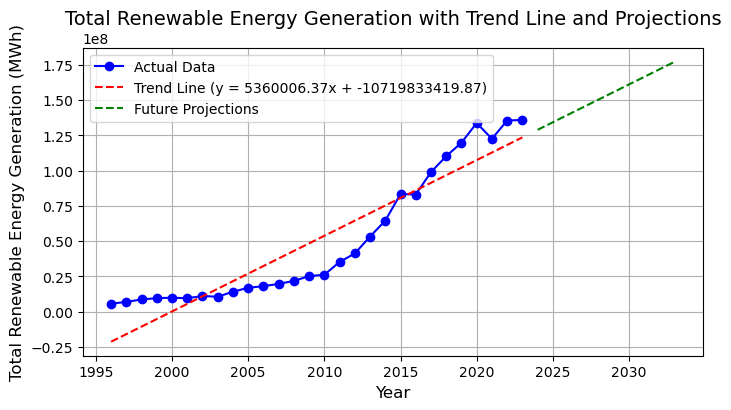

In [208]:
import numpy as np
import matplotlib.pyplot as plt

# Extract X (years) and y (generation)
X = data_cleaned['year']
y = data_cleaned['generation']

# Fit a linear trend line using np.polyfit
z = np.polyfit(X, y, 1)  # Degree 1 for linear
p = np.poly1d(z)         # Generate a polynomial function

# Extend the years for future projections
future_years = np.arange(X.max() + 1, X.max() + 11)  # Next 10 years
all_years = np.concatenate((X, future_years))  # Combine existing and future years
all_trend = p(all_years)  # Predict values for all years

# Plot Actual Data
plt.figure(figsize=(8, 4))
plt.plot(X, y, "bo-", label="Actual Data")  # Blue dots for actual data

# Plot Current Trend Line
plt.plot(X, p(X), "r--", label="Trend Line (y = {:.2f}x + {:.2f})".format(z[0], z[1]))

# Plot Future Projections
plt.plot(future_years, p(future_years), "g--", label="Future Projections")  # Green dashed line for projections

# Add Labels and Title
plt.title("Total Renewable Energy Generation with Trend Line and Projections", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Renewable Energy Generation (MWh)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

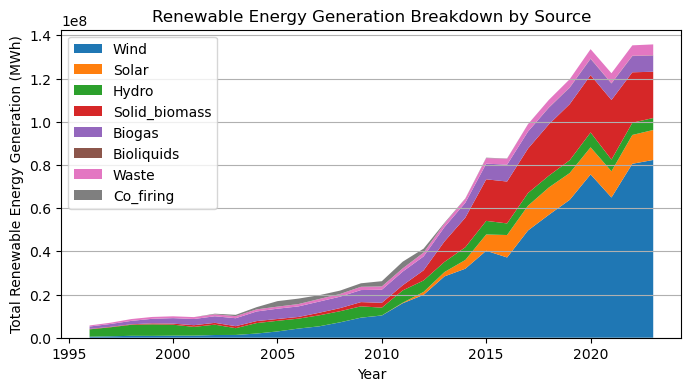

In [209]:
# Plotting graph Renewable Energy Generation Breakdown by Source
# Renewable sources to stack
sources = ['wind', 'solar', 'hydro', 'solid_biomass','biogas','bioliquids','waste','co_firing']
bottom = 0

# Create a stacked area chart for renewable energy generation by source
plt.figure(figsize=(8, 4))

# Plot stacked area chart
plt.stackplot(data_cleaned['year'], [data_cleaned[source] for source in sources], labels=[source.capitalize() for source in sources])

plt.title('Renewable Energy Generation Breakdown by Source')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Generation (MWh)')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()

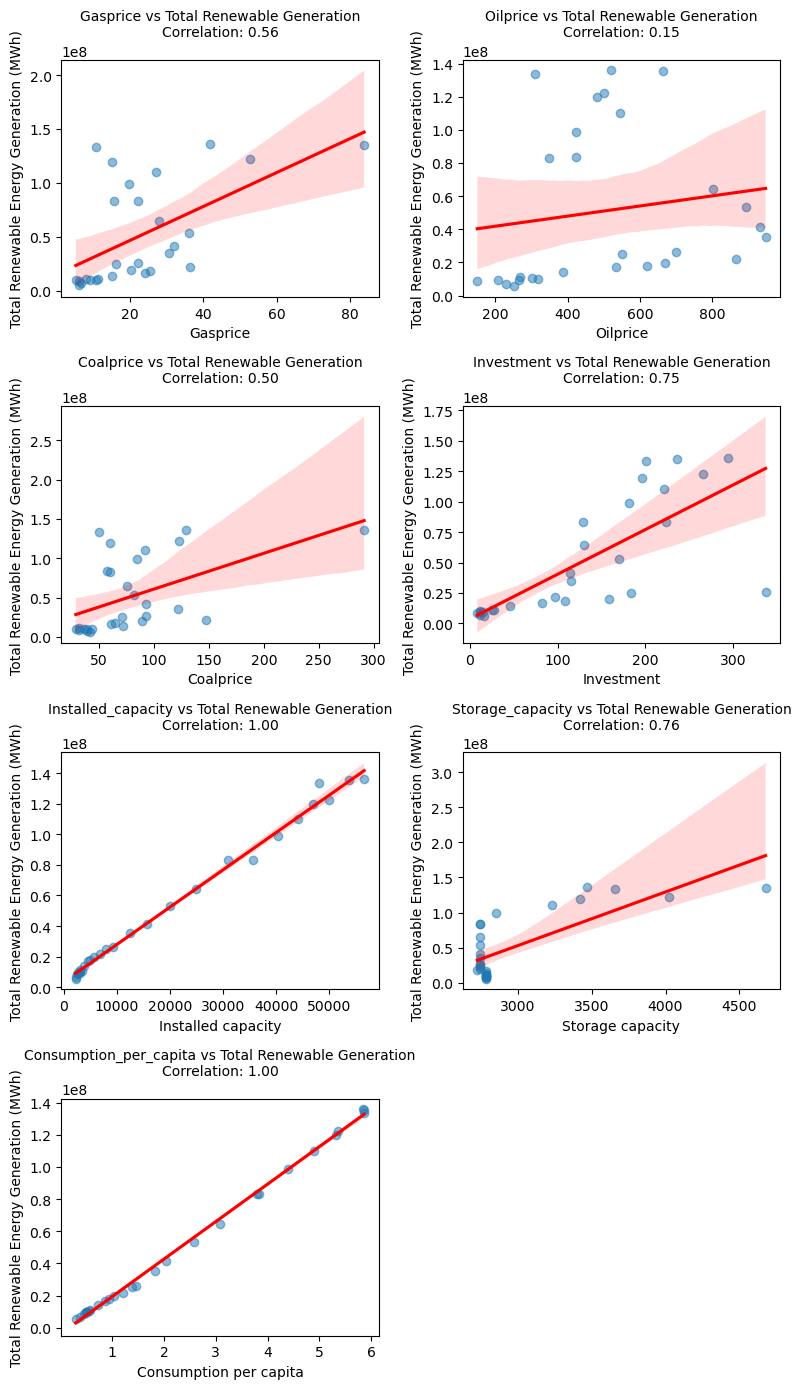

In [210]:
# Plotting scatter plot with trend line

# List of variables for the y-axis
x_variables = ['gasprice', 'oilprice', 'coalprice', 'investment', 'installed_capacity', 
               'storage_capacity', 'consumption_per_capita']

# Create scatter plots with trend lines and correlation values
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 14))
axes = axes.flatten()

for i, var in enumerate(x_variables):
    ax = axes[i]
    
    # Scatter plot with trend line
    sns.regplot(
        x=var, y='generation', data=data_cleaned, ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}
    )
    
     # Calculate correlation
    correlation = data_cleaned[var].corr(data_cleaned['generation'])
    ax.set_title(f'{var.capitalize()} vs Total Renewable Generation\nCorrelation: {correlation:.2f}', fontsize=10)
    ax.set_xlabel(var.replace("_", " ").capitalize())
    ax.set_ylabel("Total Renewable Energy Generation (MWh)")

# Remove unused subplots (if any)
for j in range(len(x_variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

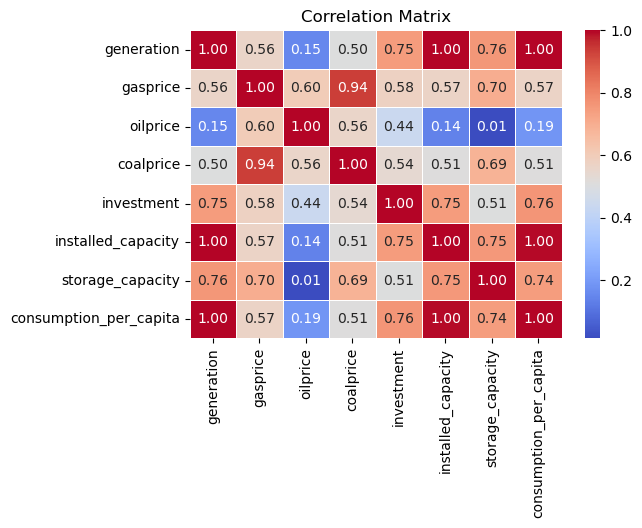

In [211]:
# Generate a heatmap for the correlation matrix
corr_matrix = data_cleaned[['generation'] + x_variables].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [212]:
from statsmodels.tsa.stattools import kpss
# Define the columns of interest for KPSS test
columns_of_interest = [
    'generation', 'gasprice', 'oilprice', 'coalprice', 'investment',
    'installed_capacity', 'storage_capacity', 'consumption_per_capita'
]

# Define the KPSS test function
def apply_kpss(series, **kwargs):
    statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)
    return {
        'KPSS Statistic': statistic,
        'p-value': p_value,
        'Lags Used': n_lags
    }

# Apply KPSS test to each variable
kpss_results = {}
for column in columns_of_interest:
    kpss_results[column] = apply_kpss(data_cleaned[column], regression='c')

# Convert results to a DataFrame
kpss_results_df = pd.DataFrame(kpss_results).T

print(kpss_results_df)

                        KPSS Statistic   p-value  Lags Used
generation                    0.726211  0.011163        3.0
gasprice                      0.621703  0.020663        2.0
oilprice                      0.309473  0.100000        3.0
coalprice                     0.557541  0.028707        2.0
investment                    0.724599  0.011309        3.0
installed_capacity            0.722661  0.011485        3.0
storage_capacity              0.445634  0.057485        3.0
consumption_per_capita        0.739419  0.010000        3.0


/var/folders/h4/8s0rt0y11_97wswk4lltx4p00000gn/T/ipykernel_1515/1747797612.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)
/var/folders/h4/8s0rt0y11_97wswk4lltx4p00000gn/T/ipykernel_1515/1747797612.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)


In [213]:
# Apply first-order differencing to the non-stationary columns
non_stationary_columns = ['generation', 'gasprice','coalprice', 'investment', 'installed_capacity', 'consumption_per_capita']
data_differenced = data_cleaned.copy()

for column in non_stationary_columns:
    data_differenced[f'{column}_diff'] = data_cleaned[column].diff()

# Drop the NaN rows introduced by differencing
data_differenced = data_differenced.dropna()

# Apply KPSS test to each differenced variable
kpss_diff_results = {}
for column in [f'{col}_diff' for col in non_stationary_columns]:
    kpss_diff_results[column] = apply_kpss(data_differenced[column], regression='c')

# Convert results to a DataFrame for better visualization
kpss_diff_results_df = pd.DataFrame(kpss_diff_results).T
print(kpss_diff_results_df)

                             KPSS Statistic   p-value  Lags Used
generation_diff                    0.403841  0.075500        3.0
gasprice_diff                      0.405643  0.074723       22.0
coalprice_diff                     0.385078  0.083587       20.0
investment_diff                    0.233936  0.100000       10.0
installed_capacity_diff            0.520111  0.037137        3.0
consumption_per_capita_diff        0.365699  0.091940        3.0


/var/folders/h4/8s0rt0y11_97wswk4lltx4p00000gn/T/ipykernel_1515/1747797612.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)


In [214]:
# Apply second-order differencing to the "installed_capacity" column
data_differenced['installed_capacity_diff2'] = data_cleaned['installed_capacity'].diff().diff()

# Drop rows with NaN values introduced by differencing
data_differenced_cleaned = data_differenced.dropna()

# Reapply KPSS test to the second-differenced data
kpss_second_diff_result = apply_kpss(data_differenced_cleaned['installed_capacity_diff2'], regression='c')

# Display the KPSS result for second differencing
kpss_second_diff_result_df = pd.DataFrame([kpss_second_diff_result], index=['installed_capacity_diff2'])

print(kpss_second_diff_result_df)

                          KPSS Statistic  p-value  Lags Used
installed_capacity_diff2        0.119727      0.1          0


/var/folders/h4/8s0rt0y11_97wswk4lltx4p00000gn/T/ipykernel_1515/1747797612.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)


In [215]:
import statsmodels.api as sm

# Prepare the data for regression
# Use the stationary transformed data for regression
independent_vars = [
    'gasprice_diff','oilprice', 'coalprice_diff', 'investment_diff',
    'installed_capacity_diff2', 'storage_capacity', 'consumption_per_capita_diff'
]

# Separate dependent and independent variables
X = data_differenced_cleaned[independent_vars]
y = data_differenced_cleaned['generation_diff']

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Run the regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
regression_summary = model.summary()

# Show the regression results to the user
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        generation_diff   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     278.0
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           5.06e-17
Time:                        21:13:48   Log-Likelihood:                -383.88
No. Observations:                  26   AIC:                             783.8
Df Residuals:                      18   BIC:                             793.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.967e+06   1.11e+06     -1.780      0.092   -4.29e+06    3.55e+05
gasprice_diff                1.044e+04   2.42e+04      0.432      0.671   -4.04e+04    6.13e+04
oilprice                    -1140.1864    765.706     -1.489      0.154   -2748.874     468.501
coalprice_diff              -5789.5858   6507.621     -0.890      0.385   -1.95e+04    7882.419
investment_diff             -1475.1048   2637.663     -0.559      0.583   -7016.628    4066.419
installed_capacity_diff2       63.0936    247.900      0.255      0.802    -457.725     583.912
storage_capacity              812.0448    344.800      2.355      0.030      87.648    1536.442
consumption_per_capita_diff  2.425e+07   6.65e+05     36.445      0.000    2.29e+07    2.56e+07
==============================================================================
Omnibus:                        0.644   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.196
Skew:                           0.211   Prob(JB):                        0.907
Kurtosis:                       3.052   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
# Check multicollinearity (VIF<10; Acceptable)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate Variance Inflation Factor (VIF) for each independent variable
vif_data = pd.DataFrame()
vif_data['independent_vars'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

              independent_vars        VIF
0                        const  56.238662
1                gasprice_diff   5.942763
2                     oilprice   1.394397
3               coalprice_diff   5.649764
4              investment_diff   1.380057
5     installed_capacity_diff2   2.057754
6             storage_capacity   1.232110
7  consumption_per_capita_diff   1.482475


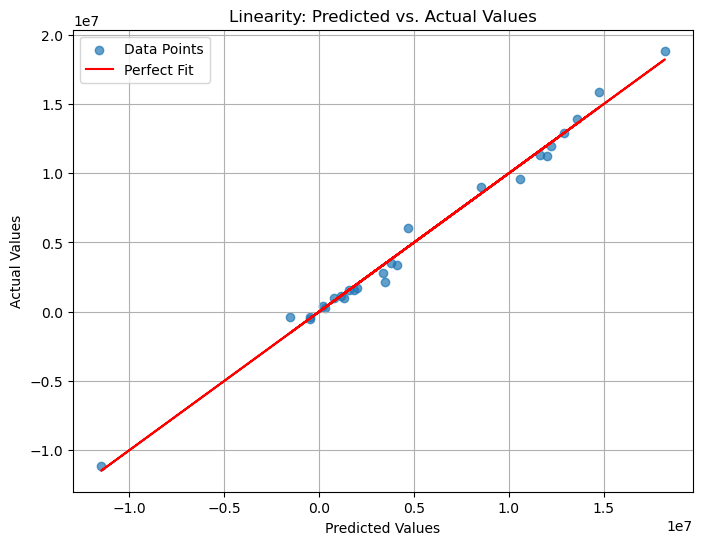

In [217]:
# Check linearity
from sklearn.linear_model import LinearRegression
# Define dependent and independent variables
X = data_differenced_cleaned[independent_vars]
y = data_differenced_cleaned['generation_diff']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Linearity: Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y, alpha=0.7, label='Data Points')
plt.plot(y_pred, y_pred, color='red', label='Perfect Fit')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity: Predicted vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [218]:
#Check homoskedasticity
from statsmodels.stats.diagnostic import het_white

# Prepare the data
independent_vars = [
    'gasprice_diff', 'oilprice', 'coalprice_diff', 'investment_diff',
    'installed_capacity_diff2', 'storage_capacity', 'consumption_per_capita_diff'
]
X = data_differenced_cleaned[independent_vars]
y = data_differenced_cleaned['generation_diff']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the OLS model (from statsmodels, not sklearn)
model = sm.OLS(y, X).fit()

# Conduct White's Test for heteroskedasticity
white_test = het_white(model.resid, X)

# Extract test results
white_statistic, white_pvalue = white_test[0], white_test[1]

# Display results
print(f"White's Test Statistic: {white_statistic:.4f}")
print(f"White's Test p-value: {white_pvalue:.4f}")

if white_pvalue < 0.05:
    print("Reject the null hypothesis: Heteroskedasticity is present.")
else:
    print("Fail to reject the null hypothesis: No heteroskedasticity detected.")

White's Test Statistic: 26.0000
White's Test p-value: 0.4076
Fail to reject the null hypothesis: No heteroskedasticity detected.


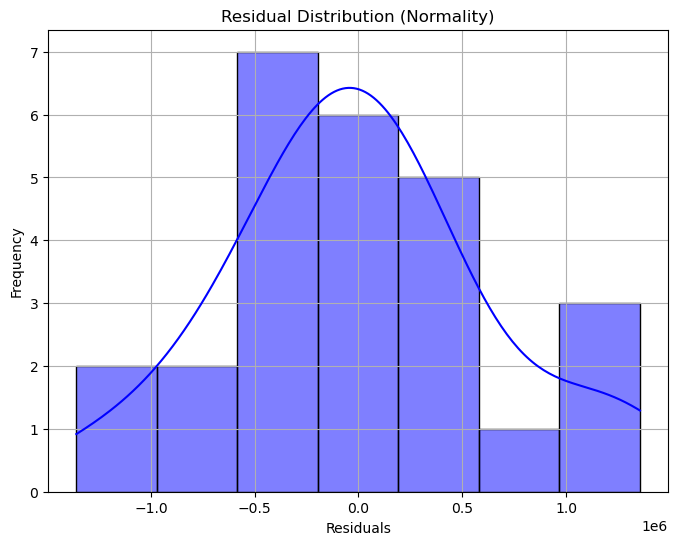

Shapiro-Wilk Test Statistic: 0.9737, p-value: 0.7191
Residuals are normally distributed.


In [219]:
# Normality of Residuals: Histogram and Shapiro-Wilk test
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution (Normality)') 
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

from scipy.stats import shapiro
# Shapiro-Wilk test
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are NOT normally distributed.")

In [220]:
from statsmodels.stats.stattools import durbin_watson
#Independence: Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
if 1.5 < dw_stat < 2.5:
    print("Residuals are independent (no autocorrelation).")
else:
    print("Residuals may be autocorrelated.")

Durbin-Watson Statistic: 1.3920
Residuals may be autocorrelated.


In [221]:
# Apply Cochrane-Orcutt to fix autocorrelation problem
residuals = model.resid[:-1]  # Exclude last observation
lagged_residuals = model.resid[1:]  # Exclude first observation
rho = np.corrcoef(residuals, lagged_residuals)[0, 1]  # First-order autocorrelation

print(f"\nEstimated Autocorrelation Coefficient (rho): {rho:.4f}")

# Step 3: Apply Cochrane-Orcutt Transformation
y_transformed = y[1:] - rho * y[:-1].values
X_transformed = X.iloc[1:] - rho * X.iloc[:-1].values

# Step 4: Refit the Model
co_model = sm.OLS(y_transformed, X_transformed).fit()

# Display the results
print("\nCochrane-Orcutt Corrected Regression:")
print(co_model.summary())


Estimated Autocorrelation Coefficient (rho): 0.2992

Cochrane-Orcutt Corrected Regression:
                            OLS Regression Results                            
Dep. Variable:        generation_diff   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     330.4
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           6.80e-17
Time:                        21:13:48   Log-Likelihood:                -367.87
No. Observations:                  25   AIC:                             751.7
Df Residuals:                      17   BIC:                             761.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------